In [19]:
import pandas as pd

# Load dataset
df = pd.read_csv("Documents/Webeet Internship/high-school-directory.csv")



In [20]:
# Clean column names
df.columns = (
    df.columns
    .str.lower()
    .str.replace(" ", "_")
    .str.replace("[^a-z0-9_]", "", regex=True)
)

df.head()

,dbn,school_name,borough,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,...,council_district,census_tract,bin,bbl,nta,zip_codes,community_districts,borough_boundaries,city_council_districts,police_precincts
0,27Q260,Frederick Douglass Academy VI High School,Queens,Q465,718-471-2154,718-471-2890,9.0,12,NaN,NaN,...,31.0,100802.0,4300730.0,4.157360e+09,Far Rockaway-Bayswater ...,20529.0,51,3,47,59
1,21K559,Life Academy High School for Film and Music,Brooklyn,K400,718-333-7750,718-333-7775,9.0,12,NaN,NaN,...,47.0,306.0,3186454.0,3.068830e+09,Gravesend ...,17616.0,21,2,45,35
2,16K393,Frederick Douglass Academy IV Secondary School,Brooklyn,K026,718-574-2820,718-574-2821,9.0,12,NaN,NaN,...,36.0,291.0,3393805.0,3.016160e+09,Stuyvesant Heights ...,18181.0,69,2,49,52
3,08X305,Pablo Neruda Academy,Bronx,X450,718-824-1682,718-824-1663,9.0,12,NaN,NaN,...,18.0,16.0,2022205.0,2.036040e+09,Soundview-Castle Hill-Clason Point-Harding Par...,11611.0,58,5,31,26
4,03M485,Fiorello H. LaGuardia High School of Music & A...,Manhattan,M485,212-496-0700,212-724-5748,9.0,12,NaN,NaN,...,6.0,151.0,1030341.0,1.011560e+09,Lincoln Square ...,12420.0,20,4,19,12


In [21]:
#Filter to only schools in Brooklyn
brooklyn_schools = df[df['borough'].str.lower() == 'brooklyn']
print(brooklyn_schools)

        dbn                                        school_name   borough  \
1    21K559        Life Academy High School for Film and Music  Brooklyn   
2    16K393     Frederick Douglass Academy IV Secondary School  Brooklyn   
7    17K122  Pathways in Technology Early College High Scho...  Brooklyn   
10   23K644                     Eagle Academy for Young Men II  Brooklyn   
12   15K462                           Secondary School for Law  Brooklyn   
..      ...                                                ...       ...   
422  17K524      International High School at Prospect Heights  Brooklyn   
423  17K408                 Academy of Hospitality and Tourism  Brooklyn   
427  15K592                Khalil Gibran International Academy  Brooklyn   
432  32K549                 Bushwick School for Social Justice  Brooklyn   
434  21K344      Rachel Carson High School for Coastal Studies  Brooklyn   

    building_code  phone_number    fax_number  grade_span_min  grade_span_max  \
1     

In [22]:
#Q1: How many total schools are in Brooklyn?
total_brooklyn_schools = brooklyn_schools.shape[0]
print(f"Total schools in Brooklyn: {total_brooklyn_schools}")

Total schools in Brooklyn: 121


In [29]:
#Q2. How many offer Grade 9 entry?
grade_9_schools = brooklyn_schools[
    (brooklyn_schools['grade_span_min'].astype(str).str.contains('9.0', na=False)) |
    (brooklyn_schools['grade_span_max'].astype(str).str.contains('9.0', na=False))
]

print(f'Brooklyn schools offering Grade 9 entry: {grade_9_schools.shape[0]}')


Brooklyn schools offering Grade 9 entry: 98


In [37]:
#Group and Summarize
#Count of schools per borough

borough_school_counts = df['borough'].value_counts()
print(borough_school_counts)


borough
Brooklyn         121
Bronx            118
Manhattan        106
Queens            80
Staten Island     10
Name: count, dtype: int64


In [39]:
#Avg. number of students per borough

avg_students = df.groupby('borough')['total_students'].mean().sort_values(ascending=False)
print(avg_students)


borough
Staten Island    1847.500000
Queens           1046.644737
Brooklyn          699.134454
Manhattan         589.825243
Bronx             490.406780
Name: total_students, dtype: float64


In [41]:
#Summary

grade_span_summary = df.groupby('borough')['grade_span_max'].describe()
print(grade_span_summary)

               count       mean       std   min   25%   50%   75%   max
borough                                                                
Bronx          118.0  11.906780  0.369506   9.0  12.0  12.0  12.0  12.0
Brooklyn       121.0  11.933884  0.381566   9.0  12.0  12.0  12.0  12.0
Manhattan      106.0  11.877358  0.472135   9.0  12.0  12.0  12.0  12.0
Queens          80.0  11.825000  0.497462  10.0  12.0  12.0  12.0  12.0
Staten Island   10.0  12.000000  0.000000  12.0  12.0  12.0  12.0  12.0


In [43]:
#Visualizations

import matplotlib.pyplot as plt

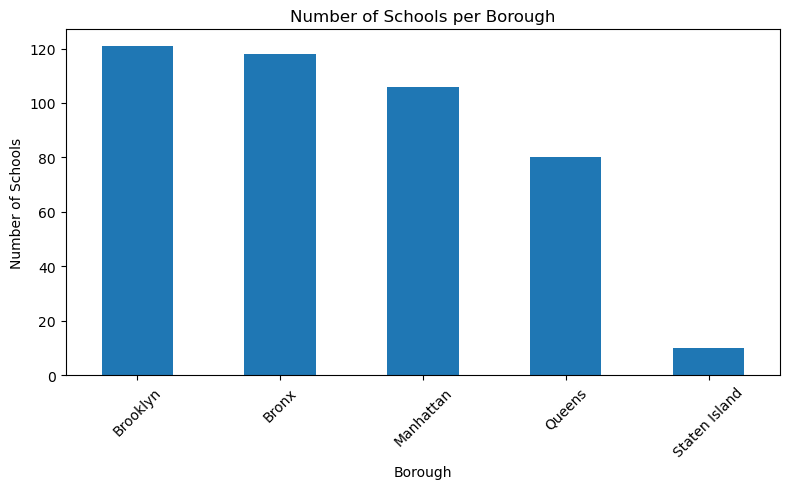

In [45]:
# Bar chart - Number of schools per borough

borough_school_counts.plot(kind='bar', figsize=(8, 5))
plt.title("Number of Schools per Borough")
plt.xlabel("Borough")
plt.ylabel("Number of Schools")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Key Insights:

#1. Brooklyn has the highest number of schools among all boroughs.
#2. A significant portion of schools in Brooklyn offer Grade 9 as an entry point, indicating strong support for secondary education.
#3. The average number of students** per borough varies, with some boroughs having larger school populations, possibly indicating 
#overcrowding or larger facilities.
